### Построение экономической модели

Определим следующие параметры:
- <i>income_user</i> - сумма, которую приносит в среднем клиент за 1 месяц
- <i>expense_user</i> - сумма, которую в среднем будем вкладывать в удержание пользователя
- <i>prob_user</i> - вероятность, с которой пользователь примет наше предложение
- <i>fraction_users</i> - доля пользователей (топ), которые будут участвовать в нашей кампании (и для которых предсказан отток)

<i>1\. Введите еще несколько параметров и на их основе постройте простую экономическую модель: формулу по которой в зависимости от значения исходных параметров вы сможете рассчитать экономический эффект от проведения кампании (= сколько денег вы получили (или наоборот потеряли) от проведения кампании по удержанию) с использование вашей модели.</i>

##### Составим формулу для расчета экономического эффекта

Возьмем для начального приближения нашей формулы предсказания, которая выдает наша модель для ушедших клиентов из обучающей выборки. Для этого возьмем предсказанные вероятности для этих пользователей и отсортируем по убыванию. Эти вероятности - вероятность ("по мнению" модели), что пользователь является уходящим. Помимо этого, помним, что вероятность того, что мнение модели верно можно оценить с помощью precision (для нашей модели = 0.6).  

In [1]:
import pandas as pd
churn_probs = pd.read_csv('churn_probs.txt', header=None).values
print churn_probs.shape
print churn_probs[:10]

(2976L, 1L)
[[ 0.98564577]
 [ 0.97623282]
 [ 0.95221959]
 [ 0.94390447]
 [ 0.9148099 ]
 [ 0.91295297]
 [ 0.90486545]
 [ 0.88972997]
 [ 0.8838761 ]
 [ 0.88028456]]


Введем также дополнительные параметры:
- <i>n_users</i> - общее количество пользователей, для которых предсказан отток
- <i>n_months</i> - среднее количество месяцев, которое клиент останется лояльным, если удержание сработает

Определим начальные значения:

In [2]:
income_user = 300
expense_user = 500
prob_user = 0.6
n_users = 2976
n_months = 6
precision = 0.6

#### Формула

В расчете на 1 клиента, для которого мы применяем удержание:
- мы в любом случае теряем сумму в размере expense_user
- мы получаем прибыль только при выполнении 3-х условий:<br>
    1\. Модель считает, что клиент является уходящим (поэтому мы собственно и применяем удержание).<br>
    2\. Модель не ошиблась, он действительно уходящий (иначе никакой прибыли нет, он бы и так остался)<br>
    3\. Удержание сработало на данного клиента

In [3]:
from math import *
import numpy as np
def effect(fraction_users):
    n = int(round(fraction_users*n_users))
    return round(np.sum(-expense_user + churn_probs[:n]*precision*prob_user*income_user*n_months), 2)
print "Экономический эффект при удержании топ-1% клиентов: {}".format(effect(0.01))

Экономический эффект при удержании топ-1% клиентов: 2054.88


<i>2\. Исходя из введенных параметров проанализируйте, какой топ пользователей, склонных к оттоку согласно модели, оптимально выбрать для проведения кампании по удержанию для таким образом, чтобы экономический эффект был наибольшим?</i>

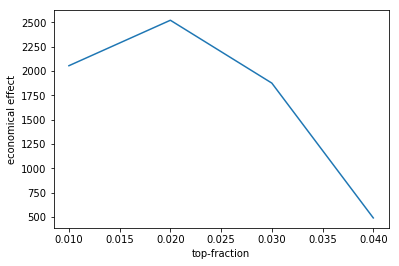

In [4]:
#построим график для разных значений доли пользователей, к которым применяется удержание, и достигаемого экономического эффекта
#дополнительно отфильтруем только прибыльную зону
import matplotlib.pyplot as plt
%matplotlib inline
fractions = np.arange(0.01, 1, 0.01)
effects = np.array(map(effect, fractions))
fractions = fractions[effects>0]
effects = effects[effects>0]
plt.plot(fractions, effects)
plt.xlabel('top-fraction')
plt.ylabel('economical effect')

In [5]:
effects

array([ 2054.88,  2522.39,  1876.14,   489.81])

По графику видно, что выборе топ-2% пользователей для удержания достигается наибольший экономический эффект

<i>3. Попробуйте усложнить экономическую модель. Добавьте еще несколько параметров и поиграйте с ними (например, измените стоимость удержания и вероятность, с которой пользователь принимает предложение), проанализируйте как меняется оптимальный размер топа?</i>

[(100, 26522.39),
 (150, 23522.39),
 (200, 20522.39),
 (250, 17522.39),
 (300, 14522.39),
 (350, 11522.39),
 (400, 8522.39),
 (450, 5522.39),
 (500, 2522.39),
 (550, -477.61),
 (600, -3477.61),
 (650, -6477.61),
 (700, -9477.61),
 (750, -12477.61),
 (800, -15477.61),
 (850, -18477.61),
 (900, -21477.61),
 (950, -24477.61)]

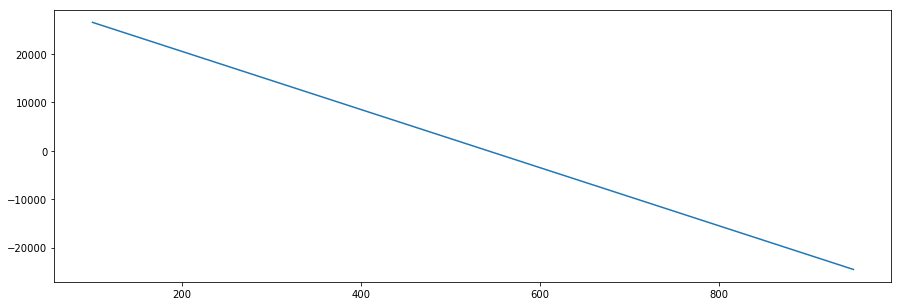

In [55]:
#попробуем поварьировать стоимость удержания при прочих параметрах неизменных
expenses = np.arange(100, 1000, 50)
effects = []
plt.figure(figsize=(15,5))
for expense in expenses:
    expense_user = expense
    effects.append(effect(0.02))
plt.plot(expenses, effects)
zip(expenses, effects)

Получается при затратах на удержание, превышающих 500, экономический эффект становится отрицательным, размер топа нужно уменьшать. Посмотрим, например, какой топ выбирать при расходах равных 600.

In [65]:
expense_user = 600
probs = np.arange(0.001, 0.1, 0.001)
map(effect, probs)[:5]

[88.34, 84.38, 20.03, -82.79, -197.33]

Таким образом, при расходах 600 мы уже должны выбирать топ размером не более 0.3%.

In [77]:
expense_user = 500

[(0.10000000000000001, -24579.6),
 (0.20000000000000001, -19159.2),
 (0.30000000000000004, -13738.8),
 (0.40000000000000002, -8318.4),
 (0.5, -2898.01),
 (0.59999999999999998, 2522.39),
 (0.70000000000000007, 7942.79),
 (0.80000000000000004, 13363.19),
 (0.90000000000000002, 18783.59)]

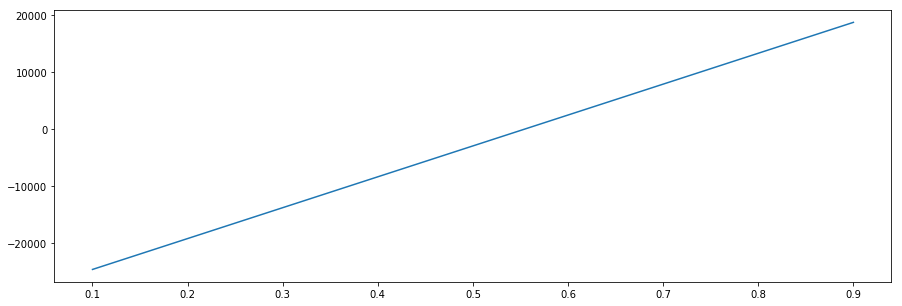

In [58]:
#попробуем поварьировать вероятность, с которой пользователь принимает предложение
probs = np.arange(0.1, 1, 0.1)
effects = []
plt.figure(figsize=(15,5))
for prob in probs:
    prob_user = prob
    effects.append(effect(0.02))
plt.plot(probs, effects)
zip(probs, effects)

Получается, что если вероятность удержания будет меньше 60%, экономический эффект становится отрицательным. Посмотрим на оптимальный размер топа пи вероятности, равной 59%.

In [71]:
prob_user = 0.59
probs = np.arange(0.001, 0.1, 0.001)
map(effect, probs)[:5]

[56.86, 22.97, -70.31, -201.41, -344.04]

Таким образом, даже маленькое уменьшение вероятности удержания очень сильно меняет размер оптимального топа: при 59% - всего 0.2%.

In [78]:
prob_user = 0.6

<i>4\. Всегда ли применение модели экономически оправданно? Приведите пример набора значений параметров, при которых применение модели перестает быть оправданным.</i>

Как уже было показано выше, при увеличении доли клиентов для удержания больше 4% или увеличении расходов на удержание больше 500 при том же размере топа, или уменьшении вероятности удержания меньше 60% при том же размере топа применение модели становится неоправданным.

<i>5\. Оцените изменение экономического эффекта от проведения кампании по удержанию при увеличении качества модели на 1%? На 3%? При ответе на вопрос укажите, по какой метрике вы оцениваете качество.</i>

Посмотрим как измениться экономический эффект при увеличении precision на 1% и на 3%.

In [84]:
precisions = [0.6, 0.61, 0.63]
effects = []
for prec in precisions:
    precision = prec
    effects.append(effect(0.02))
print effects
print (effects[1]-effects[0])/float(effects[0])
print (effects[2]-effects[0])/float(effects[0])

[2522.39, 3064.43, 4148.51]
0.214891432332
0.644674296996


Вывод: при увеличении на 1% экономический эффект увеличивается на 21%, при увеличении на 3% - на 64%.

<i>6\. Как вы думаете, является ли экономически оправданным вложение средств в улучшение качества модели? На сколько нужно улучшить модель, чтобы это качественно сказалось на экономическом эффекте от удержания?</i>

Поскольку экономический эффект увеличивается на 21% при увеличении качества на 1%, вложение средств даже в такое малое увеличение качества является экономически оправданным.